In [291]:
# Pennylane modules
import pennylane as qml
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch import nn
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, random_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Import

In [378]:
IEEE_train = pd.read_csv("/Users/soardr/VSCode Projects/Zenqor/data/IEEE-CIS/train_data.csv")
IEEE_test = pd.read_csv("/Users/soardr/VSCode Projects/Zenqor/data/IEEE-CIS/test_data.csv")

In [379]:
NSLKDD_train = pd.read_csv("/Users/soardr/VSCode Projects/Zenqor/data/NSL-KDD/Train.csv")
NSLKDD_test = pd.read_csv("/Users/soardr/VSCode Projects/Zenqor/data/NSL-KDD/Test.csv")

In [380]:
SECOM = pd.read_csv("/Users/soardr/VSCode Projects/Zenqor/data/uci-secom/uci-secom.csv")
SECOM.shape

(1567, 592)

In [381]:
SECOM

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [382]:
secom_feats = [str(i) for i in range(199, 211, 1)]
secom_feats.append('Pass/Fail')

In [383]:
SECOM = SECOM[secom_feats]

In [384]:
SECOM.dropna(inplace=True)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_14149/2461088957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SECOM.dropna(inplace=True)


In [385]:
SECOM_train_shape = int(len(SECOM) * 0.8)
SECOM_test_shape = len(SECOM) - SECOM_train_shape

In [386]:
SECOM_train = SECOM.iloc[:SECOM_train_shape, 1:]
SECOM_test = SECOM.iloc[SECOM_train_shape:, 1:]

In [387]:
del SECOM

## Dataset Truncate

In [388]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [389]:
IEEE_train = IEEE_train[:10000]
IEEE_test = IEEE_test[:10000]

In [390]:
NSLKDD_train = NSLKDD_train[:10000]
NSLKDD_test = NSLKDD_test[:10000]

In [391]:
SECOM_train = SECOM_train[:10000]
SECOM_test = SECOM_test[:10000]

In [392]:
IEEE_train = scaler.fit_transform(IEEE_train)
IEEE_test = scaler.fit_transform(IEEE_test)

In [393]:
NSLKDD_train = scaler.fit_transform(NSLKDD_train)
NSLKDD_test = scaler.fit_transform(NSLKDD_test)

In [394]:
SECOM_train = scaler.fit_transform(SECOM_train)
SECOM_test = scaler.fit_transform(SECOM_test)

## Testing data(s):

In [395]:
IEEE_train.shape, IEEE_test.shape

((10000, 51), (10000, 51))

In [396]:
corr_matrix = IEEE_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
NSLKDD_train.shape, NSLKDD_test.shape

((10000, 31), (10000, 31))

In [397]:
SECOM_train.shape, SECOM_test.shape

((1228, 12), (308, 12))

# Device

In [398]:
device = "cuda" if torch.cuda.is_available else "cpu"
device = "mps" if torch.backends.mps.is_available and torch.backends.mps.is_built else device

device

'mps'

In [399]:
n_qubits = 8
q_depth = 3

In [400]:
dev = qml.device('lightning.qubit', wires=n_qubits)
dev

<lightning.qubit device (wires=8) at 0x149483a90>

# Quantum Model

In [401]:
def H_layer(nqubits):
    """Layer of single-qubit Hadamard gates."""
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)

def RY_layer(w):
    """Layer of parametrized qubit rotations around the y axis."""
    for idx, element in enumerate(w):
        qml.RY(element, wires=idx)

def entangling_layer(nqubits):
    """Layer of CNOTs followed by another shifted layer of CNOT."""
    for i in range(0, nqubits - 1, 2):  # Even indices
        qml.CNOT(wires=[i, i + 1])
    for i in range(1, nqubits - 1, 2):  # Odd indices
        qml.CNOT(wires=[i, i + 1])

@qml.qnode(dev, interface="torch")
def quantum_net(q_input_features, q_weights_flat):
    """
    Variational quantum circuit.
    """
    # Reshape weights
    q_weights = q_weights_flat.reshape(q_depth, n_qubits)

    # Start from |+> state
    H_layer(n_qubits)

    # Embed input features
    RY_layer(q_input_features)

    # Apply trainable layers
    for k in range(q_depth):
        entangling_layer(n_qubits)
        RY_layer(q_weights[k])

    # Return expectation values
    return [qml.expval(qml.PauliZ(idx)) for idx in range(n_qubits)]
    # return qml.expval(qml.PauliZ(0))

class DressedQuantumNet(nn.Module):
    """
    Torch module for the dressed quantum network.
    """
    def __init__(self, input_shape=51, dataset_idx=1):
        super().__init__()
        self.n_qubits = n_qubits
        self.q_depth = q_depth
        self.q_delta = 0.01
        # self.pre_net = nn.Linear(input_shape, self.n_qubits)
        self.q_params = nn.Parameter(self.q_delta * torch.randn(self.q_depth * self.n_qubits))
        # self.post_net = nn.Linear(self.n_qubits, 7)

        if (dataset_idx == 1) or (dataset_idx == 2):
            self.pre_net = nn.Sequential(
                            nn.Linear(input_shape, 64),
                            nn.ReLU(),
                            nn.Linear(64, 64),
                            nn.ReLU(),
                            nn.Dropout(0.4),
                            nn.Linear(64, 32),
                            nn.ReLU(),
                            nn.Dropout(0.4),
                            nn.Linear(32, 16),
                            nn.ReLU(),
                            nn.Dropout(0.4),
                            nn.Linear(16, 8)
                        )
        elif dataset_idx == 3:
            self.pre_net = nn.Sequential(
                            nn.Linear(input_shape, 16),
                            nn.ReLU(),
                            nn.Linear(16, 16),
                            nn.ReLU(),
                            nn.Dropout(0.4),
                            nn.Linear(16, 8)
                        )
        
        self.post_net = nn.Sequential(
                            nn.Linear(n_qubits, 8),
                            nn.ReLU(),
                            nn.Dropout(0.4),
                            nn.Linear(8, 4),
                            nn.ReLU(),
                            nn.Dropout(0.4),
                            nn.Linear(4, 1)
                        )

    def forward(self, input_features):
        """
        Forward pass through the dressed quantum network.
        """
        # Preprocessing input to reduce dimensions
        pre_out = self.pre_net(input_features)
        q_in = torch.tanh(pre_out) * np.pi / 2.0

        # Apply quantum circuit
        q_out = []
        for elem in q_in:
            elem = elem.clone().detach().to(self.q_params.device)  # Ensure it's on the correct device and detached
            q_out_elem = quantum_net(elem, self.q_params)  # Output as list

            # Convert list to tensor if it's not already
            q_out_elem_tensor = torch.tensor(q_out_elem, dtype=torch.float32, device=self.q_params.device)

            # Apply linear transformation to match 2 output classes (if needed)
            # q_out_elem = torch.nn.Linear(q_out_elem_tensor.size(-1), 2)(q_out_elem_tensor)  # Adjust size to 2
            q_out_elem = self.post_net(q_out_elem_tensor)

            q_out.append(q_out_elem)

        # Stack and process
        q_out = torch.stack(q_out, dim=0)  # Ensure this is stacked correctly
        # print("q_out after loop:", q_out.shape)
        
        # q_out = q_out.to(self.q_params.device, dtype=torch.float32, requires_grad=True)

        return torch.sigmoid(q_out)

# Models

In [402]:
model_IEEE = DressedQuantumNet(input_shape=50, dataset_idx=1)
model_NSLKDD = DressedQuantumNet(input_shape=30, dataset_idx=2)
model_SECOM = DressedQuantumNet(input_shape=10, dataset_idx=3)

# DataLoader

In [403]:
SECOM_train.shape

(1228, 12)

In [404]:
SECOM_train = SECOM_train[:, 1:]
SECOM_test = SECOM_test[:, 1:]

In [405]:
X_IEEE_train = IEEE_train.iloc[:, :-1]
y_IEEE_train = IEEE_train.iloc[:, -1]

X_IEEE_test = IEEE_test.iloc[:, :-1]
y_IEEE_test = IEEE_test.iloc[:, -1]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [406]:
X_NSLKDD_train = NSLKDD_train.iloc[:, :-1]
y_NSLKDD_train = NSLKDD_train.iloc[:, -1]

X_NSLKDD_test = NSLKDD_test.iloc[:, :-1]
y_NSLKDD_test = NSLKDD_test.iloc[:, -1]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [407]:
X_SECOM_train = SECOM_train[:, :-1]
y_SECOM_train = SECOM_train[:, -1]

X_SECOM_test = SECOM_test[:, :-1]
y_SECOM_test = SECOM_test[:, -1]

In [408]:
# y_SECOM_train = y_SECOM_train.replace(-1, 0)
# y_SECOM_test = y_SECOM_test.replace(-1, 0)

y_SECOM_train = np.where(y_SECOM_train == -1, 0, y_SECOM_train)
y_SECOM_test = np.where(y_SECOM_test == -1, 0, y_SECOM_test)

In [409]:
class Dataset(Dataset):
    def __init__(self, feature_cols, label_col):
        self.features = feature_cols.astype(np.float32)
        self.labels = label_col.astype(np.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx])
        y = torch.tensor(self.labels[idx])
        return x, y

In [410]:
IEEE_dataset_train = Dataset(X_IEEE_train, y_IEEE_train)
NSLKDD_dataset_train = Dataset(X_NSLKDD_train, y_NSLKDD_train)
SECOM_dataset_train = Dataset(X_SECOM_train, y_SECOM_train)

In [411]:
IEEE_dataset_test = Dataset(X_IEEE_test, y_IEEE_test)
NSLKDD_dataset_test = Dataset(X_NSLKDD_test, y_NSLKDD_test)
SECOM_dataset_test = Dataset(X_SECOM_test, y_SECOM_test)

In [412]:
train_loader_IEEE = DataLoader(IEEE_dataset_train, batch_size=32, shuffle=True)
test_loader_IEEE = DataLoader(IEEE_dataset_test, batch_size=32, shuffle=False)

In [413]:
train_loader_NSLKDD = DataLoader(NSLKDD_dataset_train, batch_size=32, shuffle=True)
test_loader_NSLKDD = DataLoader(NSLKDD_dataset_test, batch_size=32, shuffle=False)

In [414]:
train_loader_SECOM = DataLoader(SECOM_dataset_train, batch_size=32, shuffle=True)
test_loader_SECOM = DataLoader(SECOM_dataset_test, batch_size=32, shuffle=False)

# Training

In [415]:
optimizer = optim.Adam(model_SECOM.parameters(), lr=0.001)
criterion = nn.BCELoss()
loss_fn = torch.nn.BCELoss()

In [193]:
import time

Epoch 1, Loss: 0.1629, Accuracy: 0.9617
Epoch 2, Loss: 0.1628, Accuracy: 0.9617
Epoch 3, Loss: 0.1626, Accuracy: 0.9617
Epoch 4, Loss: 0.1627, Accuracy: 0.9617
Epoch 5, Loss: 0.1626, Accuracy: 0.9617
Epoch 6, Loss: 0.1623, Accuracy: 0.9617
Epoch 7, Loss: 0.1626, Accuracy: 0.9617
Epoch 8, Loss: 0.1625, Accuracy: 0.9617
Epoch 9, Loss: 0.1626, Accuracy: 0.9617
Epoch 10, Loss: 0.1626, Accuracy: 0.9617
Epoch 11, Loss: 0.1626, Accuracy: 0.9617
Epoch 12, Loss: 0.1624, Accuracy: 0.9617
Epoch 13, Loss: 0.1625, Accuracy: 0.9617
Epoch 14, Loss: 0.1624, Accuracy: 0.9617
Epoch 15, Loss: 0.1622, Accuracy: 0.9617
Epoch 16, Loss: 0.1622, Accuracy: 0.9617
Epoch 17, Loss: 0.1622, Accuracy: 0.9617
Epoch 18, Loss: 0.1625, Accuracy: 0.9617
Epoch 19, Loss: 0.1625, Accuracy: 0.9617
Epoch 20, Loss: 0.1618, Accuracy: 0.9617


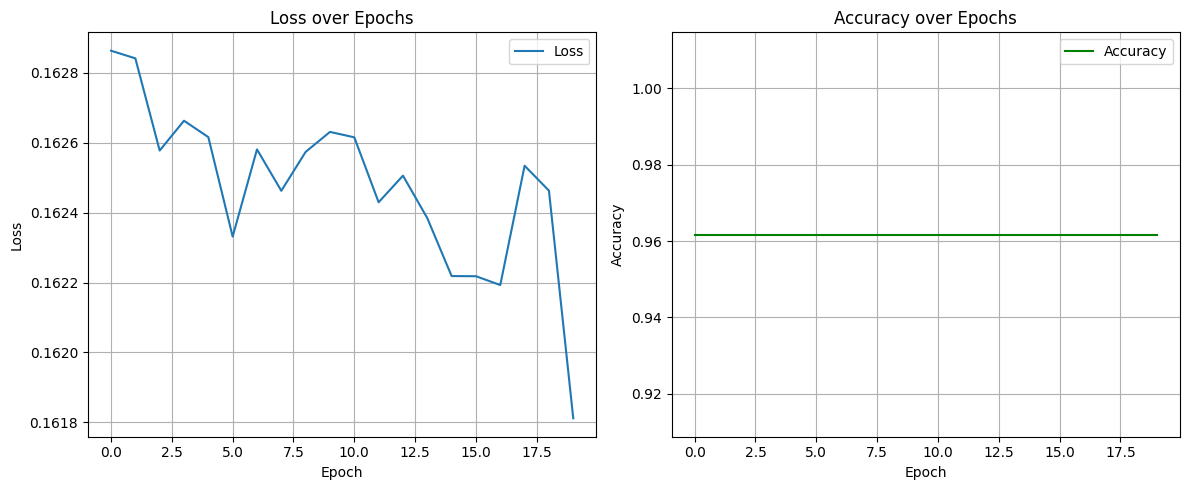

In [182]:
epoch_losses = []
epoch_accuracies = []

for epoch in range(20):
    model_IEEE.train()
    total_correct = 0
    total_samples = 0
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader_IEEE:
        X_batch = X_batch.to(model_IEEE.q_params.device)
        y_batch = y_batch.to(model_IEEE.q_params.device).unsqueeze(1)

        optimizer.zero_grad()
        output = model_IEEE(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item() * X_batch.size(0)

        # Convert predictions to binary (assuming binary classification)
        preds = (output > 0.5).float()
        total_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)

    avg_loss = epoch_loss / total_samples
    accuracy = total_correct / total_samples

    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label="Accuracy", color='green')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [183]:
model_IEEE.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader_IEEE:
        X_batch = X_batch.to(model_IEEE.q_params.device)
        y_batch = y_batch.to(model_IEEE.q_params.device).unsqueeze(1)

        output = model_IEEE(X_batch)
        loss = loss_fn(output, y_batch)

        test_loss += loss.item() * X_batch.size(0)

        # Binary predictions
        preds = (output > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

avg_test_loss = test_loss / total
test_accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.1521, Test Accuracy: 0.9649


In [184]:
count_0 = 0
for i in y_NSLKDD_train:
    if i == 0:
        count_0 += 1

print(count_0)
print(len(y_NSLKDD_train) - count_0)

5292
4708


Epoch 1, Loss: 0.6237, Accuracy: 0.6469
Epoch 2, Loss: 0.6227, Accuracy: 0.6510
Epoch 3, Loss: 0.6201, Accuracy: 0.6546
Epoch 4, Loss: 0.6202, Accuracy: 0.6534
Epoch 5, Loss: 0.6170, Accuracy: 0.6612
Epoch 6, Loss: 0.6234, Accuracy: 0.6547
Epoch 7, Loss: 0.6187, Accuracy: 0.6601
Epoch 8, Loss: 0.6225, Accuracy: 0.6505
Epoch 9, Loss: 0.6247, Accuracy: 0.6507
Epoch 10, Loss: 0.6133, Accuracy: 0.6622
Epoch 11, Loss: 0.6171, Accuracy: 0.6566
Epoch 12, Loss: 0.6160, Accuracy: 0.6565
Epoch 13, Loss: 0.6152, Accuracy: 0.6592
Epoch 14, Loss: 0.6182, Accuracy: 0.6534
Epoch 15, Loss: 0.6139, Accuracy: 0.6606
Epoch 16, Loss: 0.6162, Accuracy: 0.6611
Epoch 17, Loss: 0.6138, Accuracy: 0.6581
Epoch 18, Loss: 0.6198, Accuracy: 0.6596
Epoch 19, Loss: 0.6162, Accuracy: 0.6570
Epoch 20, Loss: 0.6198, Accuracy: 0.6529
Epoch 21, Loss: 0.6165, Accuracy: 0.6545
Epoch 22, Loss: 0.6180, Accuracy: 0.6554
Epoch 23, Loss: 0.6148, Accuracy: 0.6571
Epoch 24, Loss: 0.6158, Accuracy: 0.6614
Epoch 25, Loss: 0.6157, A

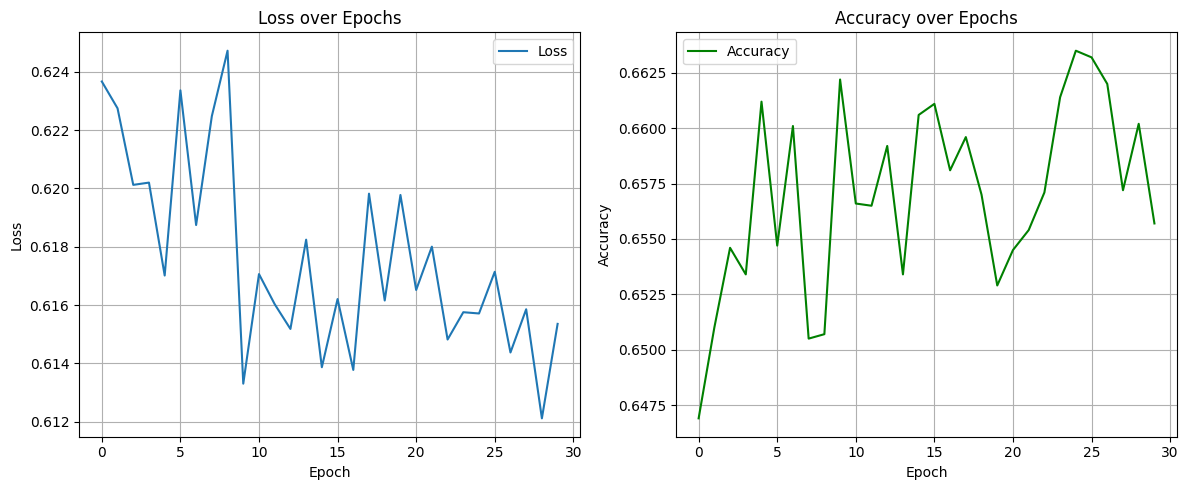

In [194]:
epoch_losses = []
epoch_accuracies = []

for epoch in range(30):
    model_NSLKDD.train()
    total_correct = 0
    total_samples = 0
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader_NSLKDD:
        X_batch = X_batch.to(model_NSLKDD.q_params.device)
        y_batch = y_batch.to(model_NSLKDD.q_params.device).unsqueeze(1)

        optimizer.zero_grad()
        output = model_NSLKDD(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item() * X_batch.size(0)

        # Convert predictions to binary (assuming binary classification)
        preds = (output > 0.5).float()
        total_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)

    avg_loss = epoch_loss / total_samples
    accuracy = total_correct / total_samples

    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label="Accuracy", color='green')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [195]:
model_NSLKDD.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader_NSLKDD:
        X_batch = X_batch.to(model_NSLKDD.q_params.device)
        y_batch = y_batch.to(model_NSLKDD.q_params.device).unsqueeze(1)

        output = model_NSLKDD(X_batch)
        loss = loss_fn(output, y_batch)

        test_loss += loss.item() * X_batch.size(0)

        # Binary predictions
        preds = (output > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

avg_test_loss = test_loss / total
test_accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6144, Test Accuracy: 0.7427


In [275]:
y_SECOM_train

0       1
1       1
2       1
3       1
4       1
       ..
1248    1
1249    1
1250    1
1251    1
1252    1
Name: Pass/Fail, Length: 1253, dtype: int64

Epoch 1, Loss: 0.8171, Accuracy: 0.0684
Epoch 2, Loss: 0.7795, Accuracy: 0.0684
Epoch 3, Loss: 0.7447, Accuracy: 0.2280
Epoch 4, Loss: 0.6961, Accuracy: 0.5033
Epoch 5, Loss: 0.6423, Accuracy: 0.5798
Epoch 6, Loss: 0.5886, Accuracy: 0.7549
Epoch 7, Loss: 0.5256, Accuracy: 0.7842
Epoch 8, Loss: 0.4800, Accuracy: 0.8086
Epoch 9, Loss: 0.4340, Accuracy: 0.8078
Epoch 10, Loss: 0.4076, Accuracy: 0.8062
Epoch 11, Loss: 0.4045, Accuracy: 0.8559
Epoch 12, Loss: 0.3820, Accuracy: 0.9316
Epoch 13, Loss: 0.3811, Accuracy: 0.9316
Epoch 14, Loss: 0.3482, Accuracy: 0.9316
Epoch 15, Loss: 0.3614, Accuracy: 0.9316
Epoch 16, Loss: 0.3547, Accuracy: 0.9316
Epoch 17, Loss: 0.3786, Accuracy: 0.9316
Epoch 18, Loss: 0.3663, Accuracy: 0.9316
Epoch 19, Loss: 0.3461, Accuracy: 0.9316
Epoch 20, Loss: 0.3381, Accuracy: 0.9316
Epoch 21, Loss: 0.3403, Accuracy: 0.9316
Epoch 22, Loss: 0.3364, Accuracy: 0.9316
Epoch 23, Loss: 0.3351, Accuracy: 0.9316
Epoch 24, Loss: 0.3436, Accuracy: 0.9316
Epoch 25, Loss: 0.3541, A

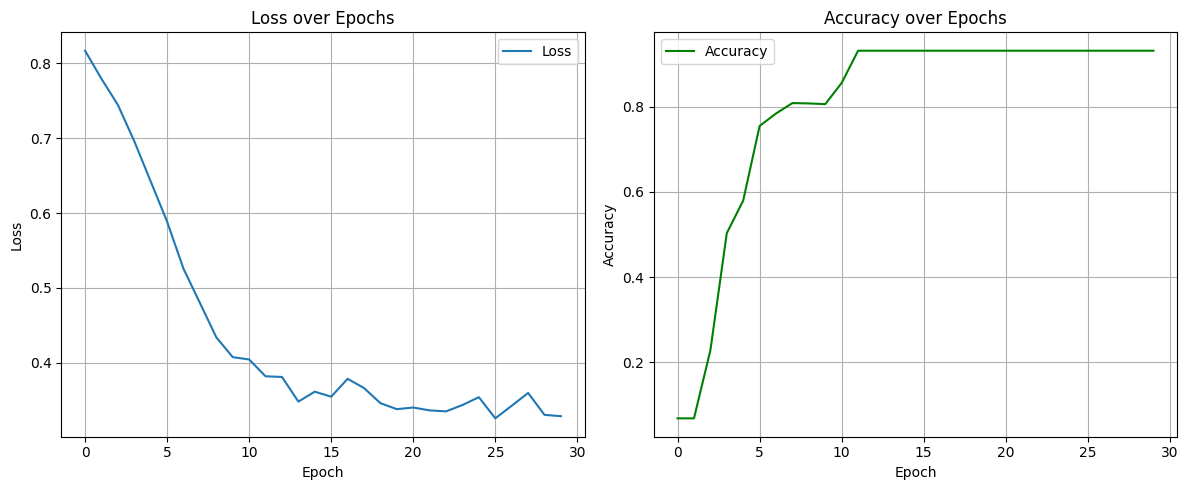

In [416]:
epoch_losses = []
epoch_accuracies = []

for epoch in range(30):
    model_SECOM.train()
    total_correct = 0
    total_samples = 0
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader_SECOM:
        # print(X_batch.min(), X_batch.max())
        # print(np.min(y_batch), np.max(y_batch))

        X_batch = X_batch.to(model_SECOM.q_params.device)
        y_batch = y_batch.to(model_SECOM.q_params.device).unsqueeze(1)

        optimizer.zero_grad()
        output = model_SECOM(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item() * X_batch.size(0)

        # Convert predictions to binary (assuming binary classification)
        preds = (output > 0.5).float()
        total_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)

    avg_loss = epoch_loss / total_samples
    accuracy = total_correct / total_samples

    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label="Accuracy", color='green')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [417]:
model_SECOM.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader_SECOM:
        X_batch = X_batch.to(model_SECOM.q_params.device)
        y_batch = y_batch.to(model_SECOM.q_params.device).unsqueeze(1)

        output = model_SECOM(X_batch)
        loss = loss_fn(output, y_batch)

        test_loss += loss.item() * X_batch.size(0)

        # Binary predictions
        preds = (output > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

avg_test_loss = test_loss / total
test_accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2489, Test Accuracy: 0.9351
